# Export and import from Other live plants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

Create the function to transform the code that generate less than 1% of total dollars in "Othe Flower bulbs" and one class to associate codes with colors

In [2]:
def define_code(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other live plants"

class ColorGenerator:
    def __init__(self):
        self.colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
                       '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
                       '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
                       '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
                       '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']
        self.colors = ['yellow', 'blue', 'green', 'purple','red', 'orange', 'black', "brown"]
        self.index_color = 0
        self.dict_color = {}
        
    def color(self, code):
        if code in self.dict_color:
            return self.dict_color[code]
        self.dict_color[code] = self.colors[self.index_color]
        self.index_color += 1
        return self.dict_color[code]
    
    def reset(self):
        self.index_color = 0
        self.dict_color = {}
        
generator = ColorGenerator()


Define path of file and columns that we need to analize

In [3]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

Read data, filter that to only have the Flower bulbs group, change the columns name and concatenate the files in one big file.

In [4]:
data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"

data_export = data_export[data_export["GROUP"] == "Other live plants"]
data_import = data_import[data_import["GROUP"] == "Other live plants"]

data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])


Print the table

In [5]:
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO', "TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)

USD                                      \
YEAR                             2011        2012        2013        2014   
CODIGO            TYPE                                                      
Araucaria 0.1 m   Export         0.00   214514.29   139882.38   118969.17   
Chrysanthemum sp. Import         0.00    32151.14    54171.59    73746.49   
Dracaena          Import         0.00   564803.70   668431.83  1701199.92   
Lilium sp.        Import         0.00     2794.01     2341.11     7562.47   
Orchids           Import         0.00   526205.66   549593.93   280927.03   
Others            Export  12718317.39   748598.65   987740.30   663631.82   
                  Import   3488342.97  3403003.46  2287738.92  3820145.80   
Rosa sp.          Import      1397.33        0.00     2414.64    16600.98   

                                                              
YEAR                            2015        2016        2017  
CODIGO            TYPE                                        
Araucaria 0.1 m   Export    50290.04   132294.06        0.00  
Chrysanthemum sp. Import    76229.48        0.00    10419.81  
Dracaena          Import   753049.29   513172.97   207810.22  
Lilium sp.        Import    18927.89      636.39        0.00  
Orchids           Import    70812.61   135168.76    69040.48  
Others            Export   496213.72  5307839.73  1218137.96  
                  Import  2494670.42  3245045.14  1076957.86  
Rosa sp.          Import        0.00        0.00     2878.21

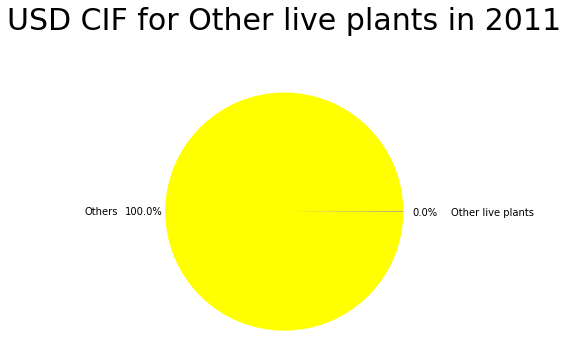

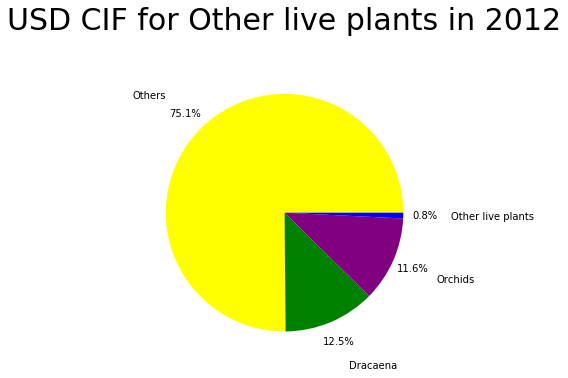

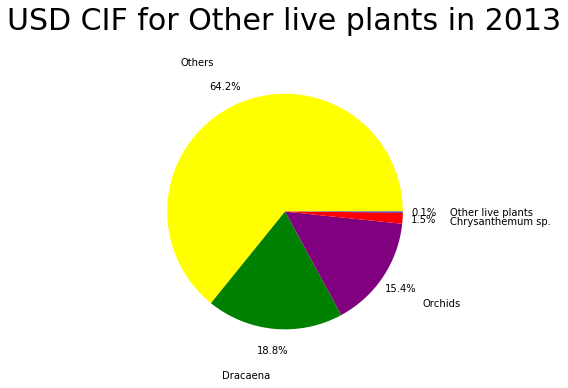

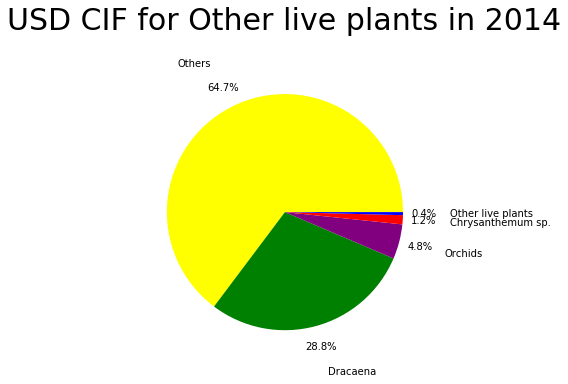

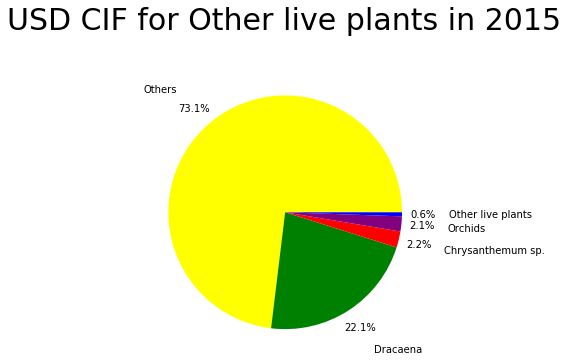

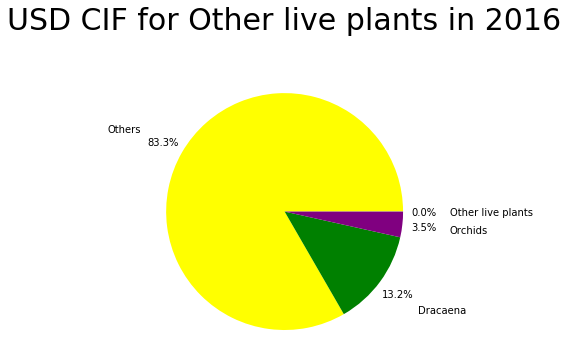

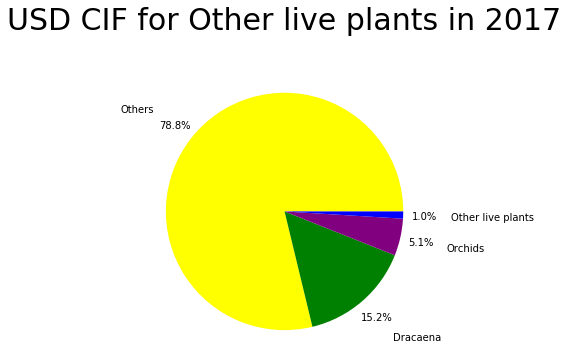

In [6]:
for year in range(2011, 2018):
    temporal_data = data_import[data_import["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD CIF for Other live plants in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD CIF for Other live plants in {}".format(year), bbox_inches='tight')
        plt.show()
generator.reset()

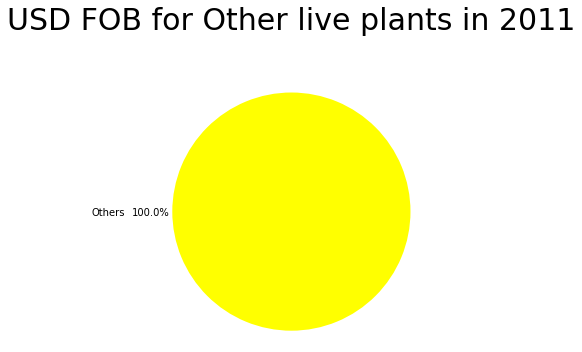

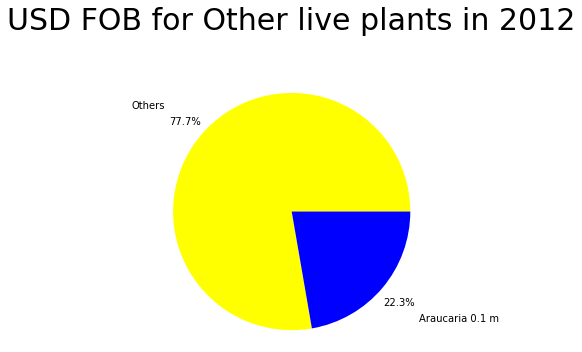

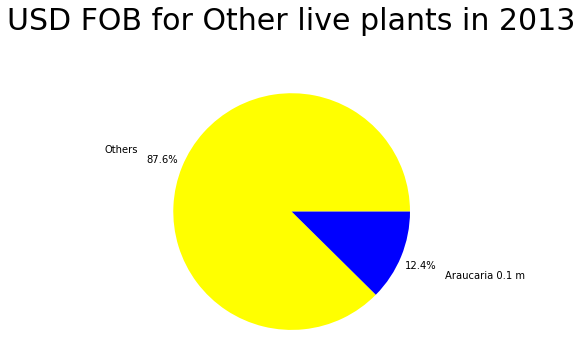

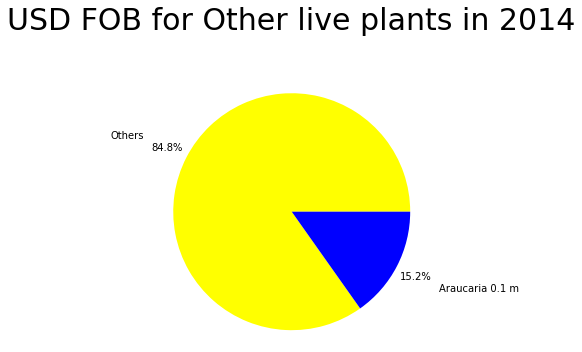

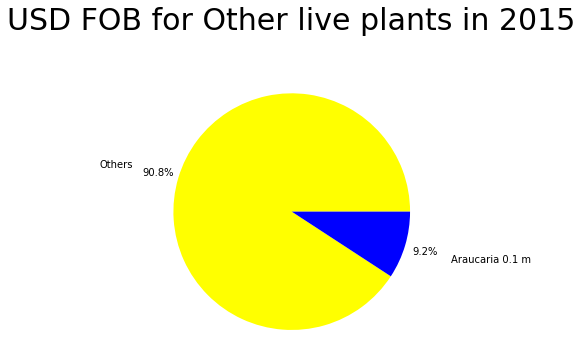

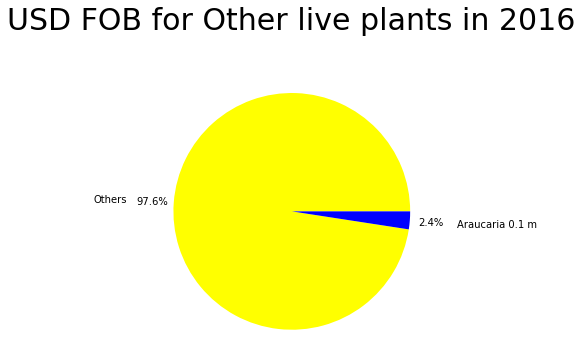

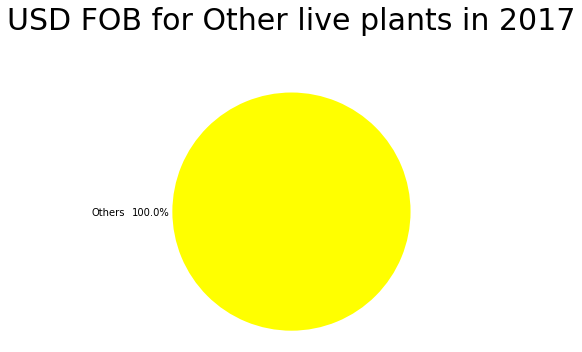

In [7]:
for year in range(2011, 2018):
    temporal_data = data_export[data_export["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD FOB for Other live plants in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD FOB for Other live plants in {}".format(year), bbox_inches='tight')
        plt.show()